3rd EXERCISE SESSION
===
|**NAME**| **KENICHI ITO** |
| :- | :- |
|**STUDENT ID**|**305056**|

# Exercises 3

In [1]:
import scipy
import scipy.stats
import numpy as np
from numpy import matlib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import math

# matplotlib.rc('text', usetex=True)
# params = {'text.latex.preamble': [r"\usepackage{amsmath}"]}
# matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
# plt.rcParams.update(params)

tab10 = cm.get_cmap(name="tab10")
cols = tab10.colors[0:3]

## 1. Explore the Markov inequality in some special cases as follows:
1. (a) A non-negative random variable has $E(X) = 2$. Find an upper bound for $P(X{\ge}5)$.
2. (b) Let $X {\sim} \mathrm{Exponential}(\beta)$ and $Y {\sim} \mathrm{Binomial}(n, p)$ so that $n = 20$ and $E(X) = E(Y) = 2$. Find the true probability $P(X > 5)$ and compare to (a).

### (a)

From markov inequation,

$$
\begin{align*}
%-----------------------------------------
P(X{>}t)
&{\ \le\ }
\frac{E(X)}{t}
\\
P(X{>}5)
&{\ \le\ }
\frac{2}{5}
%-----------------------------------------
\end{align*}
$$

Hence, the upper bound of $P(X{\ge}5)$ is $\frac{2}{5}=0.4$.

### (b)

#### for $E(X)$, $X {\sim} \mathrm{Exponential}(\beta)$:

$$
\begin{align*}
%---------------------
E(X) 
&=
\beta
\\
%---------------------
2
&=
\beta
\\
%---------------------
\end{align*}
$$

#### for $E(Y)$, $Y {\sim} \mathrm{Binomial}(n=20,p)$:

*pdf* of Y is,

$$
\begin{align*}
%---------------------
P(Y=k, n=20)
&=
{}_{20}\mathrm{C}_{k}
p^k(1-p)^{20-k}.
\\
%---------------------
\end{align*}
$$

#### for $E(X)$, $X {\sim} \mathrm{Exponential}(\beta)$.
$$
\begin{align*}
%---------------------
E(Y)
&=
\sum_{k=0}^{n}
k{\cdot}{}_{n}\mathrm{C}_{k}
p^k(1-p)^{n-k}
\\
%---------------------
&=
\sum_{k=1}^{n}
k{\cdot}
{}_{n}\mathrm{C}_{k}
p^k(1-p)^{n-k}
\\
%---------------------
&=
n
\sum_{k=1}^{n}
    {}_{n-1}\mathrm{C}_{k-1}
    p^k
    (1-p)^{n-k}
{\ \ \ \ \ \ }
{\because\ } 
    k
    {\cdot}
    {}_{n}\mathrm{C}_{k}
    = 
    n
    {\cdot}
    {}_{n-1}\mathrm{C}_{k-1} 
\\
%---------------------
&=
np
\sum_{k=1}^{n}
    {}_{n-1}\mathrm{C}_{k-1}
    p^{k-1}
    (1-p)^{n-k}
\\
%---------------------
&=
np
\sum_{m=0}^{n-1}
    {}_{n-1}\mathrm{C}_{m}
    p^{m}
    (1-p)^{n-(m+1)}
{\ \ \ \ \ \ }
(\text{let }k-1=m.)
\\
%---------------------
&=
np
\sum_{m=0}^{n-1}
    {}_{n-1}\mathrm{C}_{m}
    p^{m}
    (1-p)^{(n-1)-m}
\\
%---------------------
&=
np
(p+ (1-p) )^{n-1}
{\ \ \ \ \ \ }
{\because\ } 
(x+y)^{n} 
= 
\sum_{i=1}^{n}
{}_{n}\mathrm{C}_{i} x^{i} y^{n-i}
\\
%---------------------
&=
np
.
%---------------------
\end{align*}
$$

Now, $E(Y)=2$ and $n=20$, then
$$
\begin{align*}
%---------------------
E(Y)
&=
np
\\
2
&=
20p
\\
p
&=
\frac{1}{10}.
%---------------------
\end{align*}
$$

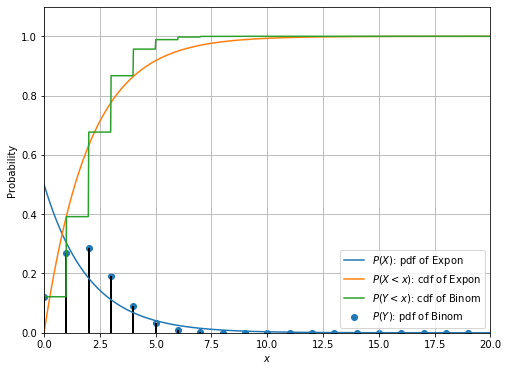

In [106]:
X_expon = scipy.stats.expon(scale=2,loc=0)
X_binom = scipy.stats.binom(n=20,p=0.1)
#-----------------------------------------------------------
X=np.linspace(0,20,1000)
X_disc=np.arange(0,20)

fig_ = plt.figure(figsize=(8,6))
ax_ = plt.subplot(111)

ax_.plot(X, X_expon.pdf(X), label="$P(X)$: pdf of Expon")
ax_.vlines(X_disc,0, X_binom.pmf(X_disc),
           linestyle="-", lw=2)
ax_.scatter(X_disc, X_binom.pmf(X_disc),
            label="$P(Y)$: pdf of Binom",
            linestyle="-")
ax_.plot(X, X_expon.cdf(X), label="$P(X<x)$: cdf of Expon")
ax_.plot(X, X_binom.cdf(X), label="$P(Y<x)$: cdf of Binom")
#-----------------------------------------------------------
ax_.grid(True)
# ax_.axis('equal')
ax_.legend(fontsize=24)
ax_.axes.set_ylabel("Probability")
ax_.axes.set_xlim(0,20)
ax_.axes.set_ylim(0,1.1)
ax_.axes.set_xlabel("$x$")

ax_.legend()
ax_.grid(True)

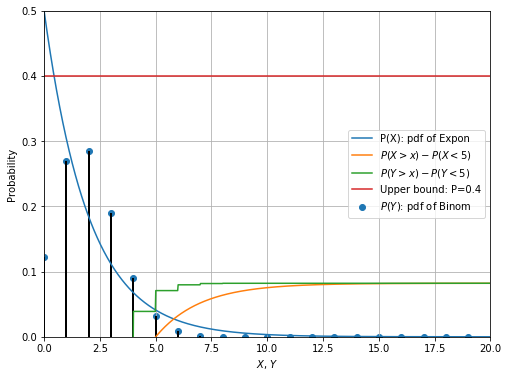

In [151]:
X_expon = scipy.stats.expon(scale=2,loc=0)
X_binom = scipy.stats.binom(n=20,p=0.1)
#-----------------------------------------------------------
X=np.linspace(0,20,1000)
X_disc=np.arange(0,20)

fig_ = plt.figure(figsize=(8,6))
ax_ = plt.subplot(111)

ax_.plot(X, X_expon.pdf(X), label="P(X): pdf of Expon")
ax_.vlines(X_disc,0, X_binom.pmf(X_disc),
           linestyle="-", lw=2)
ax_.scatter(X_disc, X_binom.pmf(X_disc),
            label="$P(Y)$: pdf of Binom",
            linestyle="-")
ax_.plot(X, X_expon.cdf(X)-X_expon.cdf(5), label="$P(X>x)-P(X<5)$")
ax_.plot(X, X_binom.cdf(X)-X_expon.cdf(5), label="$P(Y>x)-P(Y<5)$")
ax_.plot(X, 0.4*np.ones(X.shape), 
         label="Upper bound: P=0.4")
#-----------------------------------------------------------
ax_.grid(True)
# ax_.axis('equal')
ax_.legend(fontsize=24)
ax_.axes.set_ylabel("Probability")
ax_.axes.set_xlim(0,20)
ax_.axes.set_ylim(0,.5)
ax_.axes.set_xlabel("$X$, $Y$")

ax_.legend()
ax_.grid(True)

In [148]:
expected_expon = scipy.integrate.quad(lambda x: x*X_expon.pdf(x), 0,1000)
X_disc = np.arange(0,20)
expected_binom = np.sum(X_disc*X_binom.pmf(X_disc))
print("E(X) = {0:.16f} ≒ {1:}".format(expected_expon[0], 2) )
print("E(Y) = {0:.16f} ≒ {1:}".format(expected_binom, 2) )

print("P(X>5) = {0:8.6f} < {1:}".format(1-X_expon.cdf(5), 0.4) )
print("P(Y>5) = {0:8.6f} < {1:}".format(1-X_binom.cdf(5), 0.4) )

E(X) = 2.0000000000000004 ≒ 2
E(Y) = 1.9999999999999976 ≒ 2
P(X>5) = 0.082085 < 0.4
P(Y>5) = 0.011253 < 0.4


## 2. Upper bound from Chebyshev's iquation.
Assume that $\mathrm{E}(X) = 5$ and $\mathrm{Var}(X) = 5$.
- (a) Find an upper limit for $P(|X-E(X)|{\ge}10)$ using Chebyshev's inequality.
- (b) Consider two different probability distributions that fulfill the conditions for $E(X)$ and $var(X)$. Compute $P(|X-E(X)|{\ge}10)$ for these and compare to the upper limit you got in (a).

### (a) upper limit for $P(|X-E(X)|{\ge}10)$

From Chebyshev's inequation,

$$
\begin{align*}
%-----------------------------------------
P(|X-\mathrm{E}(X)|{\ge}t)
&{\ \le\ }
\frac{\mathrm{Var}(X)}{t^2}
\\
%-----------------------------------------
P(|X-\mathrm{E}(X)|{\ge}10)
&{\ \le\ }
\frac{5}{10^2}
\\
%-----------------------------------------
P(|X-\mathrm{E}(X)|{\ge}10)
&{\ \le\ }
\frac{5}{100}
\\
%-----------------------------------------
\end{align*}
$$

Hence, the upper bound of $P(|X-\mathrm{E}(X)|{\ge}10)$ is $\frac{5}{100}=0.05$.

### (b) probability distributions that fulfill the conditions for E(X) and var(X).

In [215]:
X_norm = scipy.stats.norm(loc=5,scale=np.sqrt(5))
print("Noraml distribution: \n  Mean ={0:5},\n  Variance ={1:10}".format(X_norm.mean(), X_norm.var()) )

X_logist = scipy.stats.logistic(loc=5,scale=np.sqrt(5*3/(np.pi)**2))
print("Logistic distribution:\n  Mean ={0:5},\n  Variance ={1:10}".format(X_logist.mean(), X_logist.var()) )

X_laplace = scipy.stats.laplace(loc=5,scale=np.sqrt(5/2))
print("Double exponential distribution:\n  Mean ={0:5},\n  Variance ={1:10}".format(X_laplace.mean(), X_laplace.var()) )

X_poisson = scipy.stats.poisson(loc=0,mu=5)
print("Poisson distribution:\n  Mean ={0:5},\n  Variance ={1:10}".format(X_poisson.mean(), X_poisson.var()) )

X_list=[X_norm, X_logist, X_laplace, X_poisson]
labels=["Norm","Logistic","Laplace", "Poisson"]

Noraml distribution: 
  Mean =  5.0,
  Variance =5.000000000000001
Logistic distribution:
  Mean =  5.0,
  Variance =5.000000000000001
Double exponential distribution:
  Mean =  5.0,
  Variance =5.000000000000001
Poisson distribution:
  Mean =  5.0,
  Variance =       5.0


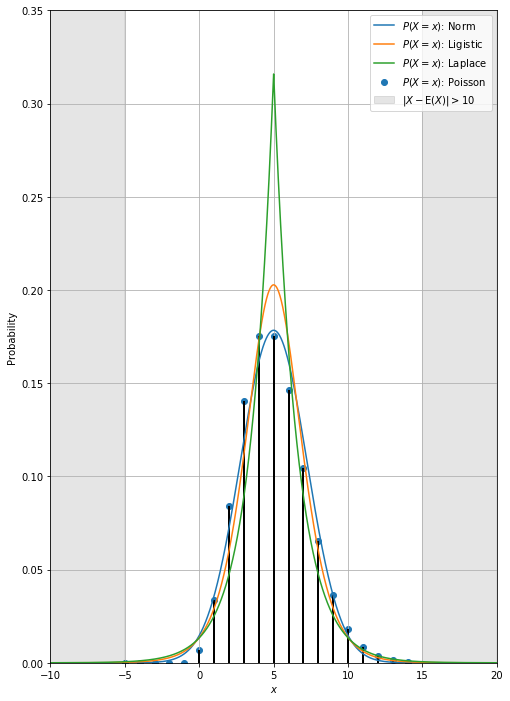

In [241]:
X=np.linspace(-15+5,15+5,10000)
X_disc=np.arange(-10+5,10+5)
p_zero = np.zeros(X.shape)
p_one  = np.ones(X.shape)
X_outer = np.abs(X-5)>=10

#-----------------------------------------------------------
fig_ = plt.figure(figsize=(8,12))
ax_ = plt.subplot(111)

#
ax_.plot(X, X_norm.pdf(X), label="$P(X=x)$: Norm")
ax_.plot(X, X_logist.pdf(X), label="$P(X=x)$: Ligistic")
ax_.plot(X, X_laplace.pdf(X), label="$P(X=x)$: Laplace")

ax_.vlines(X_disc,0, X_poisson.pmf(X_disc),
           linestyle="-", lw=2)
ax_.scatter(X_disc, X_poisson.pmf(X_disc),
            label="$P(X=x)$: Poisson",
            linestyle="-")
fill_    = ax_.fill_between(X, p_zero, X_outer, where=X_outer,
                            color="k", alpha=0.1,
                            label="$|X-\mathrm{E}(X)|>10$")
#-----------------------------------------------------------
ax_.grid(True)
# ax_.axis('equal')
ax_.legend(fontsize=24)
ax_.axes.set_ylabel("Probability")
ax_.axes.set_xlim(-10,20)
ax_.axes.set_ylim(0,0.35)
ax_.axes.set_xlabel("$x$")

ax_.legend()
ax_.grid(True)